# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [2]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)
TF_ENABLE_GPU_GARBAGE_COLLECTION=True

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# from platform import python_version

# print(python_version())

Num GPUs Available:  1


#### Load Image Data

In [3]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0013 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


C:\Users\bober\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [5]:
VGG16 = tf.keras.applications.VGG16(include_top=False, input_shape=(224,224,3), weights="imagenet")
# VGG19 = tf.keras.applications.VGG19(include_top=False, input_shape=(224,224,3), weights="imagenet")
# ResNet152V2 = tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3), weights="imagenet")

model = tf.keras.models.Sequential([
        
        VGG16,
#         VGG19,
#         ResNet152V2,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu', name='feature_dense'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(4, activation='sigmoid')
])

model.summary()

# build the model
model.build(input_shape=(None, 224, 224))

# compiling the model
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=LEARNING_RATE, rho=0.95, epsilon=1e-07),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
____________________________________________

#### [5 points] Train Model

In [6]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# raise NotImplementedError("Use the model.fit function to train your network")

history = model.fit(train_batches,  
                    epochs=NUM_EPOCHS, 
                    verbose=2, 
                    validation_data=valid_batches, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_steps=STEP_SIZE_VALID
                   )

22
6


C:\Users\bober\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\bober\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100


C:\Users\bober\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4947: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


21/21 - 18s - loss: 1.4950 - accuracy: 0.2767 - val_loss: 1.4245 - val_accuracy: 0.2600
Epoch 2/100
21/21 - 6s - loss: 1.5213 - accuracy: 0.2233 - val_loss: 1.3567 - val_accuracy: 0.2600
Epoch 3/100
21/21 - 6s - loss: 1.4919 - accuracy: 0.2767 - val_loss: 1.3636 - val_accuracy: 0.3400
Epoch 4/100
21/21 - 6s - loss: 1.4030 - accuracy: 0.3350 - val_loss: 1.3567 - val_accuracy: 0.3200
Epoch 5/100
21/21 - 6s - loss: 1.4123 - accuracy: 0.2913 - val_loss: 1.2340 - val_accuracy: 0.6000
Epoch 6/100
21/21 - 6s - loss: 1.4292 - accuracy: 0.2864 - val_loss: 1.3180 - val_accuracy: 0.4200
Epoch 7/100
21/21 - 6s - loss: 1.4277 - accuracy: 0.2961 - val_loss: 1.3118 - val_accuracy: 0.3800
Epoch 8/100
21/21 - 6s - loss: 1.3628 - accuracy: 0.3204 - val_loss: 1.2575 - val_accuracy: 0.4800
Epoch 9/100
21/21 - 6s - loss: 1.3252 - accuracy: 0.4000 - val_loss: 1.2247 - val_accuracy: 0.4600
Epoch 10/100
21/21 - 6s - loss: 1.3294 - accuracy: 0.4190 - val_loss: 1.2291 - val_accuracy: 0.5200
Epoch 11/100
21/21 -

21/21 - 7s - loss: 0.6662 - accuracy: 0.7095 - val_loss: 0.5436 - val_accuracy: 0.8200
Epoch 84/100
21/21 - 7s - loss: 0.7007 - accuracy: 0.6845 - val_loss: 0.6298 - val_accuracy: 0.7400
Epoch 85/100
21/21 - 7s - loss: 0.6436 - accuracy: 0.7476 - val_loss: 0.5451 - val_accuracy: 0.7200
Epoch 86/100
21/21 - 7s - loss: 0.6174 - accuracy: 0.7573 - val_loss: 0.6069 - val_accuracy: 0.6800
Epoch 87/100
21/21 - 7s - loss: 0.6468 - accuracy: 0.7233 - val_loss: 0.5322 - val_accuracy: 0.7000
Epoch 88/100
21/21 - 7s - loss: 0.6604 - accuracy: 0.7184 - val_loss: 0.5556 - val_accuracy: 0.7600
Epoch 89/100
21/21 - 7s - loss: 0.6608 - accuracy: 0.7136 - val_loss: 0.5279 - val_accuracy: 0.7400
Epoch 90/100
21/21 - 7s - loss: 0.6921 - accuracy: 0.6893 - val_loss: 0.5990 - val_accuracy: 0.6800
Epoch 91/100
21/21 - 7s - loss: 0.6676 - accuracy: 0.7381 - val_loss: 0.4945 - val_accuracy: 0.8000
Epoch 92/100
21/21 - 7s - loss: 0.6811 - accuracy: 0.7136 - val_loss: 0.5256 - val_accuracy: 0.7000
Epoch 93/100


#### [5 points] Plot Accuracy and Loss During Training

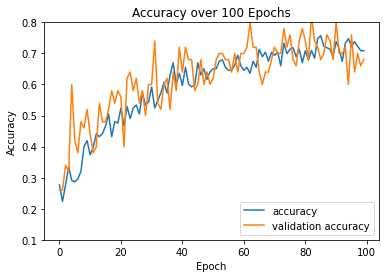

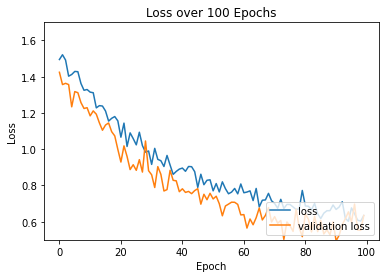

In [10]:
import matplotlib.pyplot as plt

# plot for the Acurracy vs Epochs
plt.title('Accuracy over 100 Epochs')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, .8])
plt.legend(loc='lower right')
plt.show()

# plot for the Loss vs Epochs
plt.title('Loss over 100 Epochs')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.7])
plt.legend(loc='lower right')
plt.show()

#### Testing Model

In [11]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
 5/36 [===>..........................] - ETA: 0s - loss: 1.0074 - accuracy: 0.6000    

C:\Users\bober\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1909: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


36/36 [==============================] - 1s 23ms/step - loss: 0.6709 - accuracy: 0.6944
Test loss: 0.670887291431427
Test accuracy: 0.6944444179534912


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.


C:\Users\bober\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1937: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


130/130 [==============================] - 3s 18ms/step


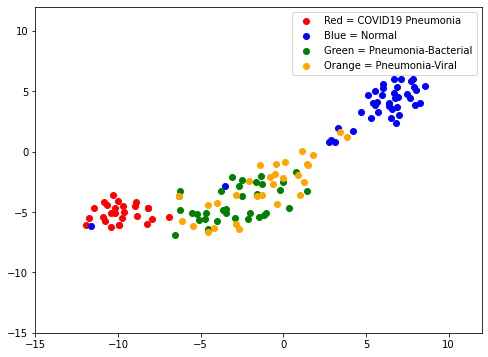

In [9]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the four classes.")

labels = []

# for x in range(len(tsne_eval_generator)):
#     labels += [tsne_eval_generator[x][1][0]]
    
# print(labels)
# print(tsne_eval_generator[1][1][0][3])

for x in range(len(tsne_eval_generator)):
    if tsne_eval_generator[x][1][0][0] == [1.]:
        labels += ['red']
    elif tsne_eval_generator[x][1][0][1] == [1.]:
        labels += ['blue']
    elif tsne_eval_generator[x][1][0][2] == [1.]:
        labels += ['green']
    elif tsne_eval_generator[x][1][0][3] == [1.]:
        labels += ['orange']
        
# print(labels)

pred_intermediate = intermediate_layer_model.predict_generator(tsne_eval_generator,130,verbose=1)

    
features = TSNE(n_components=2).fit_transform(pred_intermediate)
features_sub1 = features[:,0]
# print(features_sub1)
features_sub2 = features[:,1]
# print(features_sub2)

covid_x = []
covid_y = []

norm_x = []
norm_y = []

bact_x = []
bact_y = []

viral_x = []
viral_y = []

for i in range(len(features_sub1)):
    if labels[i] == 'red':
        covid_x += [features_sub1[i]]
        covid_y += [features_sub2[i]]
    if labels[i] == 'blue':
        norm_x += [features_sub1[i]]
        norm_y += [features_sub2[i]]
    if labels[i] == 'green':
        bact_x += [features_sub1[i]]
        bact_y += [features_sub2[i]]
    if labels[i] == 'orange':
        viral_x += [features_sub1[i]]
        viral_y += [features_sub2[i]]
    
# print(features)
plt.figure(figsize=(8,6))
plt.scatter(covid_x, covid_y, c='red')
plt.scatter(norm_x, norm_y, c='blue')
plt.scatter(bact_x, bact_y, c='green')
plt.scatter(viral_x, viral_y, c='orange')
plt.ylim([-15, 12])
plt.xlim([-15, 12])
# plt.legend()
plt.legend(labels=('Red = COVID19 Pneumonia', 'Blue = Normal', 'Green = Pneumonia-Bacterial', 'Orange = Pneumonia-Viral'),
                                                                                    loc='best')    
            
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->